In [1]:
#reading json file in its entirity

%matplotlib notebook
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

index='temp'
index_number= 5

data = pd.read_json('weather.json', lines=True)
print(data)

                                                     city        time  \
0       {'id': 14256, 'name': 'Azadshahr', 'findname':...  1554462304   
1       {'id': 56166, 'name': 'Jilib', 'findname': 'JI...  1554462304   
2       {'id': 55671, 'name': 'Kismaayo', 'findname': ...  1554462304   
3       {'id': 60019, 'name': 'Eyl', 'findname': 'EYL'...  1554462304   
4       {'id': 23814, 'name': 'Kahriz', 'findname': 'K...  1554462304   
...                                                   ...         ...   
209574  {'id': 8247183, 'name': 'Borovlyany', 'findnam...  1554462506   
209575  {'id': 8260052, 'name': 'Pontyclun', 'findname...  1554462506   
209576  {'id': 8060327, 'name': 'Tlogomojo', 'findname...  1554462506   
209577  {'id': 102908597, 'name': 'Gerton', 'findname'...  1554462506   
209578  {'id': 8260172, 'name': 'West Greenwich', 'fin...  1554462506   

                                                     main  \
0       {'temp': 287.07, 'pressure': 1022, 'humidity':...   
1

In [2]:
#expanding the main category of the json file

df_main=pd.DataFrame()

df_main=data['main'][0:209578]

df_main.to_json('weather_main.json', orient='values')

df_main_expanded=pd.read_json('weather_main.json')
print(df_main_expanded)
    
    

           temp  pressure  humidity  temp_min  temp_max
0       287.070   1022.00        71   284.150   289.150
1       309.929   1008.39        36   309.929   309.929
2       301.329   1009.87       100   301.329   301.329
3       302.229   1010.67        80   302.229   302.229
4       285.620   1021.00        66   285.150   286.150
...         ...       ...       ...       ...       ...
209573  292.629   1013.67        87   292.629   292.629
209574  284.150   1019.00        29   284.150   284.150
209575  282.490    998.00        81   281.150   283.710
209576  300.829   1010.91        89   300.829   300.829
209577  282.930   1020.00       100   280.370   285.370

[209578 rows x 5 columns]


In [3]:
#expanding the 'city' category of the json file

df_city=pd.DataFrame()
df_city=data['city'][0:209578]
df_city.to_json('weather_city.json', orient='values')
df_city_expanded=pd.read_json('weather_city.json')
print(df_city_expanded)

#expanding the 'coord' category within the 'city' category
df_coord=pd.DataFrame()
df_coord=df_city_expanded['coord'][0:209578]
df_coord.to_json('weather_coord.json', orient='values')
df_coord_expanded=pd.read_json('weather_coord.json')
print(df_coord_expanded)

               id        name    findname country  \
0           14256   Azadshahr   AZADSHAHR      IR   
1           56166       Jilib       JILIB      SO   
2           55671    Kismaayo    KISMAAYO      SO   
3           60019         Eyl         EYL      SO   
4           23814      Kahriz      KAHRIZ      IR   
...           ...         ...         ...     ...   
209573    8235911     Xinshao     XINSHAO      CN   
209574    8247183  Borovlyany  BOROVLYANY      BY   
209575    8260052   Pontyclun   PONTYCLUN      GB   
209576    8060327   Tlogomojo   TLOGOMOJO      ID   
209577  102908597      Gerton      GERTON      US   

                                                  coord  zoom  
0                  {'lon': 48.570728, 'lat': 34.790878}    10  
1        {'lon': 42.785351, 'lat': 0.48829000000000006}     9  
2       {'lon': 42.545361, 'lat': -0.35817000000000004}     6  
3                     {'lon': 49.816399, 'lat': 7.9803}     5  
4                  {'lon': 47.055302, 'lat'

In [4]:
print(df_coord_expanded.lon.max())
print(df_coord_expanded.lon.min())

df_coord_expanded.lon.max()-df_coord_expanded.lon.min()

179.5
-179.866669


359.366669

In [5]:
print(df_coord_expanded.lat.max())
print(df_coord_expanded.lat.min())
df_coord_expanded.lat.max()-df_coord_expanded.lat.min()

78.785301
-78.158562


156.94386300000002

In [6]:
#concatenating expanded dataframes
df_final = pd.concat([df_coord_expanded, df_main_expanded], axis=1)

#rescaling lattitude and longitude for easy binning (and reversing lattitude to correspond with azimuthal angle)
df_final['lat']=100-(df_final['lat']+90)*100/180
df_final['lon']=(df_final['lon']+180)*100/360

print(df_final)

              lon        lat     temp  pressure  humidity  temp_min  temp_max
0       63.491869  30.671734  287.070   1022.00        71   284.150   289.150
1       61.884820  49.728728  309.929   1008.39        36   309.929   309.929
2       61.818156  50.198983  301.329   1009.87       100   301.329   301.329
3       63.837889  45.566500  302.229   1010.67        80   302.229   302.229
4       63.070917  30.897888  285.620   1021.00        66   285.150   286.150
...           ...        ...      ...       ...       ...       ...       ...
209573  81.557475  36.217262  292.629   1013.67        87   292.629   292.629
209574  57.687611  19.998777  284.150   1019.00        29   284.150   284.150
209575  49.057931  21.376877  282.490    998.00        81   281.150   283.710
209576  80.881278  53.745833  300.829   1010.91        89   300.829   300.829
209577  27.125540  30.289352  282.930   1020.00       100   280.370   285.370

[209578 rows x 7 columns]


In [7]:
#Making a cartesian categorical grouping based on evenly spaced bins of specified longitude and latitude

#Rounding
df_final.lat=df_final.lat.round().astype("int")
df_final.lon=df_final.lon.round().astype("int")
print(df_final)

#Making 100 equal to 0 to complete the circle
df_final.lat.replace(100, 0, inplace=True)
df_final.lon.replace(100, 0, inplace=True)

df_final["coord"]=list(zip(df_final.lat, df_final.lon))
print(df_final)

#df_final.reset_index(inplace=True)
#df_final.head()

        lon  lat     temp  pressure  humidity  temp_min  temp_max
0        63   31  287.070   1022.00        71   284.150   289.150
1        62   50  309.929   1008.39        36   309.929   309.929
2        62   50  301.329   1009.87       100   301.329   301.329
3        64   46  302.229   1010.67        80   302.229   302.229
4        63   31  285.620   1021.00        66   285.150   286.150
...     ...  ...      ...       ...       ...       ...       ...
209573   82   36  292.629   1013.67        87   292.629   292.629
209574   58   20  284.150   1019.00        29   284.150   284.150
209575   49   21  282.490    998.00        81   281.150   283.710
209576   81   54  300.829   1010.91        89   300.829   300.829
209577   27   30  282.930   1020.00       100   280.370   285.370

[209578 rows x 7 columns]
        lon  lat     temp  pressure  humidity  temp_min  temp_max     coord
0        63   31  287.070   1022.00        71   284.150   289.150  (31, 63)
1        62   50  309.929   1

In [8]:
#averaging main data by geographic bin
df_avg=df_final.groupby('coord').mean().reset_index()
print(df_avg)

#re-adding the lattitude and longitude bins to the averaged data as integer columns
df_avg.lon=df_avg.lon.astype("int")
df_avg.lat=df_avg.lat.astype("int")
df_avg.head()

         coord   lon   lat     temp  pressure  humidity  temp_min  temp_max
0      (6, 21)  21.0   6.0  248.529   1018.91      78.0   248.529   248.529
1      (7, 31)  31.0   7.0  254.043   1019.53      74.0   254.043   254.043
2      (7, 54)  54.0   7.0  267.150   1004.00      85.0   267.150   267.150
3      (7, 55)  55.0   7.0  267.150   1004.00      85.0   267.150   267.150
4      (8, 17)  17.0   8.0  249.679   1019.47      70.0   249.679   249.679
...        ...   ...   ...      ...       ...       ...       ...       ...
2552  (80, 40)  40.0  80.0  276.279    987.59      98.0   276.279   276.279
2553  (81, 31)  31.0  81.0  277.150    990.00      80.0   277.150   277.150
2554  (81, 41)  41.0  81.0  275.579    988.51      95.0   275.579   275.579
2555  (93, 55)  55.0  93.0  222.429   1022.79       0.0   222.429   222.429
2556  (93, 97)  97.0  93.0  244.279    985.15     100.0   244.279   244.279

[2557 rows x 8 columns]


,coord,lon,lat,temp,pressure,humidity,temp_min,temp_max
0,"(6, 21)",21,6,248.529,1018.91,78.0,248.529,248.529
1,"(7, 31)",31,7,254.043,1019.53,74.0,254.043,254.043
2,"(7, 54)",54,7,267.150,1004.00,85.0,267.150,267.150
3,"(7, 55)",55,7,267.150,1004.00,85.0,267.150,267.150
4,"(8, 17)",17,8,249.679,1019.47,70.0,249.679,249.679


In [9]:
#Setting up a grid for graphing on a sphere
theta = np.linspace(0,np.pi, 100)
phi=np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
print(phi)
print(theta)

#conversion from spherical to euclidean coords
x= np.cos(phi)*np.sin(theta)
y = np.sin(phi)*np.sin(theta)
z=np.cos(theta)
print(x)
print(y)
print(z)

[[0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 ...
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03173326 0.03173326 0.03173326 ... 0.03173326 0.03173326 0.03173326]
 [0.06346652 0.06346652 0.06346652 ... 0.06346652 0.06346652 0.06346652]
 ...
 [3.07812614 3.07812614 3.07812614 ... 3.07812614 3.07812614 3.07812614]
 [3.10985939 3.10985939 3.10985939 ... 3.10985939 3.10985939 3.10985939]
 [3.14159265 3.14159265 3.14159265 ... 3.14159265 3.14159265 3.14159265]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.17279335e

In [10]:
#maximum and minimum data for normalizing indices
figmax, figmin = df_avg['temp'].max(), df_avg['temp'].min()
print(figmax)
print(figmin)

#producing a color map based on data of the chosen index
figcolors=np.zeros(phi.shape)
for index, row in df_avg.iterrows():
    figcolors[row['lat']][row['lon']]=row['temp']
figcolors = np.where((figcolors-figmin)>=0, (figcolors-figmin)/(figmax-figmin), .5)
print(figcolors)

317.004
222.429
[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


<IPython.core.display.Javascript object>


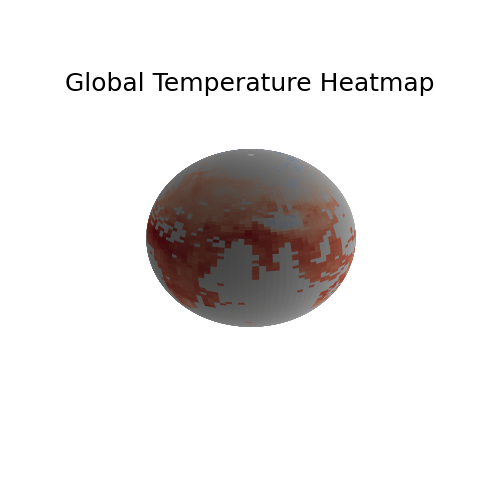

In [11]:
#creating a rotating animation of a globe with the colormap specified above
fig = plt.figure(figsize=plt.figaspect(1.))
axes = fig.add_subplot(111, projection='3d')

surf = axes.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.coolwarm(figcolors))
axes.set_axis_off()
fig.suptitle('Global Temperature Heatmap', fontsize=18, x=0.52, y=.85)
for idx, angle in enumerate(np.linspace(0, 360, 10)):
    axes.view_init(30, angle)
    plt.draw()
    plt.savefig('temp_heatmap-%04d.png' % idx)
plt.show()

In [12]:
"""
Benefits of my data visualization:

1. It condenses a large data set into one diagram without losing much of the data's descriptiveness.
2. It is interactive. With the command "%matplotlib notebook", an inline visual is created whose axes can be rotated
around using the cursor.
3. It is visually intuitive, easy to understand, and the gaps in global data are filled in with the white color
representing the most neutral zone of the divergent colormap, in which warmer colors represent warmer temperatures.
4. It is accesible to a wide audience without training in data analysis.
5. The same code can be adapted, by changing the "index" and "index_number" parameters, to a colormap of any of the
other weather measurements. Temperature was used in the above diagram for brevity.
6. The packages I have used are basic; mainly matplotlib, pandas, and numpy. The only nonstandard package needed was 
"mpl_toolkits.mplot3d", which was essential for the 3d graphics.
"""

'\nBenefits of my data visualization:\n\n1. It condenses a large data set into one diagram without losing much of the data\'s descriptiveness.\n2. It is interactive. With the command "%matplotlib notebook", an inline visual is created whose axes can be rotated\naround using the cursor.\n3. It is visually intuitive, easy to understand, and the gaps in global data are filled in with the white color\nrepresenting the most neutral zone of the divergent colormap, in which warmer colors represent warmer temperatures.\n4. It is accesible to a wide audience without training in data analysis.\n5. The same code can be adapted, by changing the "index" and "index_number" parameters, to a colormap of any of the\nother weather measurements. Temperature was used in the above diagram for brevity.\n6. The packages I have used are basic; mainly matplotlib, pandas, and numpy. The only nonstandard package needed was \n"mpl_toolkits.mplot3d", which was essential for the 3d graphics.\n'